In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from numba import jit
from numba import njit, prange
import math

In [2]:
blank_array = np.zeros((3, 400, 400))

In [3]:
score_position_array = np.zeros((400, 450))
# radius_distance_list = [7.5, 19, 99, 107, 170, 178]
# radius_value_list = [0.5, 0.25, 0.1, 0.3, 0.0, 0.2]

radius_distance_list = [178, 170, 107, 99, 19, 7.5]

#0=boarder, 0.2=x2, 0.8=outside, 0.3=x3, 0.1=inside, 0.25=outer_ring, 0.5=bullseye
radius_value_list = [0.2, 0.8, 0.3, 0.1, 0.25, 0.5]


for k in range(len(radius_distance_list)):
    distance = radius_distance_list[k]
    area_value = 1
    for i in range(len(blank_array[0, 0, :])):
        for j in range(len(blank_array[0, :, 0])):
            y_dis = i-200
            x_dis = j-200
            radius = np.sqrt(y_dis**2 + x_dis**2)
            if radius<distance:
                    score_position_array[i, j] = radius_value_list[k]
                    
#making boxes for out of bounds and bounce
#ofb = 0.7, bouce = 0.99
score_position_array[20:70, 380:430] = 0.7
score_position_array[330:380, 380:430] = 0.99

In [4]:
score_number_array = np.zeros((400, 450))

#creating the second layer of the array to represent positional value
#each section is 18 degrees

# def find_angle_1(rerence_point, iso_point, practice_blank_array):
    


j_first_ref_point = 199
i_first_ref_point = 199

for i in range(len(blank_array[0, 0, :])):
    for j in range(len(blank_array[0, :, 0])):
        if j>=200 and i<=199:
            opposite = 200 - i
            adjacent = j - 199
            iso_angle = math.degrees(math.atan(opposite/adjacent))
            if iso_angle>=0 and iso_angle<9:
                score_number_array[i, j] = 6
            if iso_angle>=9 and iso_angle<27:
                score_number_array[i, j] = 13
            if iso_angle>=27 and iso_angle<45:
                score_number_array[i, j] = 4
            if iso_angle>=45 and iso_angle<63:
                score_number_array[i, j] = 18
            if iso_angle>=63 and iso_angle<81:
                score_number_array[i, j] = 1
            if iso_angle>=81 and iso_angle<90:
                score_number_array[i, j] = 20
            

        if j<200 and i<=199:
            opposite = 200 - i
            adjacent = 200 - j 
            iso_angle = math.degrees(math.atan(opposite/adjacent))
            if iso_angle>=81 and iso_angle<90:
                score_number_array[i, j] = 20
            if iso_angle>=63 and iso_angle<81:
                score_number_array[i, j] = 5
            if iso_angle>=45 and iso_angle<63:
                score_number_array[i, j] = 12
            if iso_angle>=27 and iso_angle<45:
                score_number_array[i, j] = 9
            if iso_angle>=9 and iso_angle<27:
                score_number_array[i, j] = 14
            if iso_angle>=0 and iso_angle<9:
                score_number_array[i, j] = 11
                    
        if j<200 and i>199:
            opposite = i - 200
            adjacent = 200 - j 
            iso_angle = math.degrees(math.atan(opposite/adjacent))
            if iso_angle>=0 and iso_angle<9:
                score_number_array[i, j] = 11
            if iso_angle>=9 and iso_angle<27:
                score_number_array[i, j] = 8
            if iso_angle>=27 and iso_angle<45:
                score_number_array[i, j] = 16
            if iso_angle>=45 and iso_angle<63:
                score_number_array[i, j] = 7
            if iso_angle>=63 and iso_angle<81:
                score_number_array[i, j] = 19
            if iso_angle>=81 and iso_angle<90:
                score_number_array[i, j] = 3         
            
            
            
        if j>=200 and i>199:
            opposite = i - 200
            adjacent = j - 199
            iso_angle = math.degrees(math.atan(opposite/adjacent))
            if iso_angle>=81 and iso_angle<90:
                score_number_array[i, j] = 3
            if iso_angle>=63 and iso_angle<81:
                score_number_array[i, j] = 17
            if iso_angle>=45 and iso_angle<63:
                score_number_array[i, j] = 2
            if iso_angle>=27 and iso_angle<45:
                score_number_array[i, j] = 15
            if iso_angle>=9 and iso_angle<27:
                score_number_array[i, j] = 10
            if iso_angle>=0 and iso_angle<9:
                score_number_array[i, j] = 6


In [5]:
with open('C:/Users/msind/Box Sync/code/darts/nightly_darts_data.csv') as fhand:
    df = pd.read_csv(fhand)

In [6]:
frequency_array = np.zeros((len(df), 400, 450))

In [7]:
def determine_position_score(prev_freq, score_position_array, score_number_array):
    for i in range(len(prev_freq[:, 0])):
        for j in range(len(prev_freq[0, :])):
            if position == 0.25 or position == 0.5:
                if score_position_array[i, j] == position:
                    prev_freq[i, j] +=1 

            if position == 0.7 or position == 0.99:
                if score_position_array[i, j] == position:
                    prev_freq[i, j] +=1 
            else:
                if score_position_array[i, j] == position:
                    if score_number_array[i, j] == score:
                        prev_freq[i, j] +=1
    return prev_freq
    

def update_first_dart(frequency_array, determine_position_score, score_position_array, score_number_array):
    prev_freq = frequency_array[0, :, :]
    updated_array = determine_position_score(prev_freq, score_position_array, score_number_array)
    
    return updated_array

    
def update_one_dart(prev_freq, determine_position_score, score_position_array, score_number_array):
    updated_array = determine_position_score(prev_freq, score_position_array, score_number_array)
    
    return updated_array
        

    
    
    
iteration = 0
for a in range(len(frequency_array[:, 0, 0])):
    position = df.iloc[a][3]
    score = df.iloc[a][4]
    if a == 0:
        one_dart_update = update_first_dart(frequency_array, determine_position_score, score_position_array, score_number_array)
    else:
        one_dart_update = update_one_dart(frequency_array[a-1, :, :], determine_position_score, score_position_array, score_number_array)
    frequency_array[a, :, :] = one_dart_update

<AxesSubplot:>

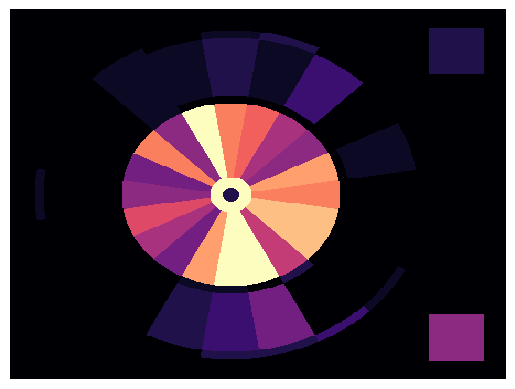

In [8]:
sns.heatmap(frequency_array[300, :, :], vmin = 0, vmax = 15, xticklabels=[], yticklabels=[], cbar = False, cmap = 'magma')


In [21]:
position_outline_array = np.zeros((400, 450))
for i in range(len(score_position_array[10:440, 0])):
    for j in range(len(score_position_array[0, 10:440])):
        position = score_position_array[i+10, j+10]
        
        up = score_position_array[i+9, j+10]
        down = score_position_array[i+11, j+10]
        left = score_position_array[i+10, j+9]
        right = score_position_array[i+10, j+11]
        if up != position:
            position_outline_array[i+10, j+10] = 1
        if down != position:
            position_outline_array[i+10, j+10] = 1
        if left != position:
            position_outline_array[i+10, j+10] = 1
        if right != position:
            position_outline_array[i+10, j+10] = 1
                    


IndexError: index 400 is out of bounds for axis 0 with size 400

<AxesSubplot:>

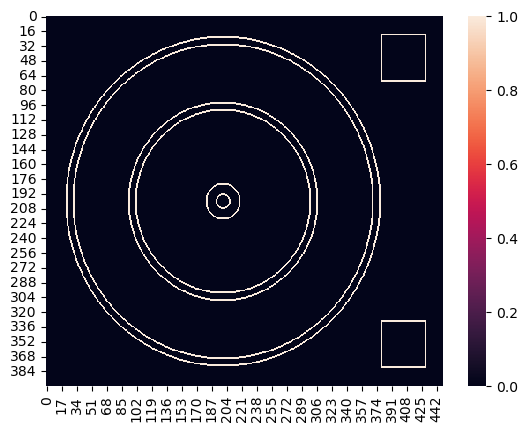

In [10]:
sns.heatmap(position_outline_array)

In [11]:
score_outline_array = np.zeros((400, 450))
for i in range(len(score_number_array[10:390, 0])):
    for j in range(len(score_number_array[0, 10:390])):
        position = score_number_array[i+10, j+10]
        
        up = score_number_array[i+9, j+10]
        down = score_number_array[i+11, j+10]
        left = score_number_array[i+10, j+9]
        right = score_number_array[i+10, j+11]
        if up != position:
            score_outline_array[i+10, j+10] = 1
        if down != position:
            score_outline_array[i+10, j+10] = 1
        if left != position:
            score_outline_array[i+10, j+10] = 1
        if right != position:
            score_outline_array[i+10, j+10] = 1
centerpoint = 199
for i in range(len(score_outline_array[:, 0])):
    for j in range(len(score_outline_array[0, :])):
        radius = np.sqrt((i - centerpoint)**2 + (j - centerpoint)**2)
        if radius > 178 or radius < 19:
            score_outline_array[i, j] = 0
        

In [12]:
centerpoint

199

<AxesSubplot:>

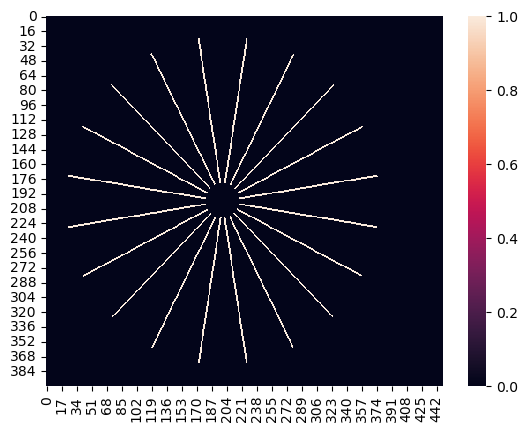

In [13]:
sns.heatmap(score_outline_array)

In [14]:
combined_array = score_outline_array + position_outline_array

In [15]:
melded_array = np.zeros((400, 450))
for i in range(len(score_outline_array[:, 0])):
    for j in range(len(score_outline_array[0, :])):
        if combined_array[i, j] > 0:
            melded_array[i, j] = 1

In [16]:
y_coords, x_coords = np.where(melded_array == 1)

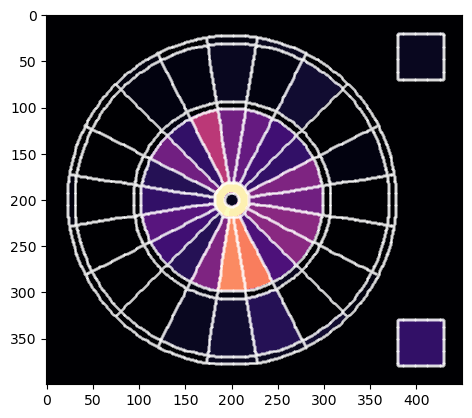

In [19]:
plt.imshow(frequency_array[300, :, :], cmap='magma')
plt.scatter(x_coords, y_coords, s = 0.1, color = 'white')